In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error 

from joblib import dump, load

### 0. Data Wrangling

In [64]:
df = pd.read_csv("UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


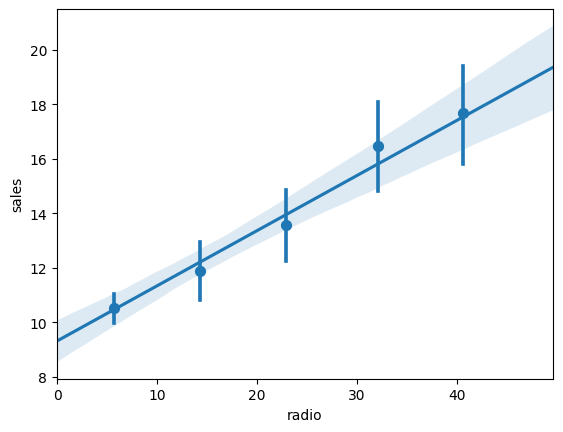

In [65]:
# scatter plot to check relationship
# sns.scatterplot(x='radio',y='sales',data=df);
sns.regplot(data=df, x='radio', y='sales', x_bins=5);

In [66]:
# create features
X = df.drop('sales',axis=1)
y = df['sales']
polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)

# train test split 
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

# Converter "fits" to data, in this case, reads in every X column
# Then it "transforms" and ouputs the new polynomial data
poly_features = polynomial_converter.fit_transform(X) # result in 9 features with interaction terms 

# scale features 
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### 1. Simple LR

In [67]:
# fit and evaluate model 
model = LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)
test_predictions = model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [68]:
# save model and predict 
dump(model, 'sales_poly_model.joblib') 
dump(polynomial_converter,'poly_converter.joblib')
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [76]:
# get new forecasts and plot
campaign = [[149,22,12]]
campaign_poly = loaded_poly.transform(campaign)
model.predict(campaign_poly)

array([14.50087775])

### 2. Ridge Regression

In [83]:
# ridge regression 
# use SCORERS.keys() to see all scoring options
ridge_model = RidgeCV(alphas=(0.1, 1, 10), scoring='neg_mean_absolute_error')
ridge_model.fit(X_train,y_train)
ridge_model.alpha_

1.0

In [85]:
# evaluation 
test_predictions = ridge_model.predict(X_test)
MAE = mean_absolute_error(y_test,test_predictions)
MSE = mean_squared_error(y_test,test_predictions)
RMSE = np.sqrt(MSE)

In [ ]:
# LASSO -> also serves as feature selection 
from sklearn.linear_model import LassoCV
lasso_cv_model = LassoCV(eps=0.1, n_alphas=100, cv=5, max_iter=10000)

In [ ]:
lasso_cv_model.fit(X_train, y_train)

In [ ]:
lasso_cv_model.alpha 

In [ ]:
test_predictions = lasso_cv_model.predict(X_test)

In [ ]:
MAE = mean_absolute_error(y_test, test_predictions)
RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))

### 3. Lasso Regression

In [88]:
# fit model
lasso_cv_model = LassoCV(eps=0.1,n_alphas=100,cv=5)
lasso_cv_model.fit(X_train,y_train)
lasso_cv_model.alpha_

0.4943070909225832

### 4. Elastic Net

In [11]:
# fit model
en_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, 1], eps=0.001, n_alphas=100, max_iter=1000000)
en_cv_model.fit(X_train, y_train)
en_cv_model.l1_ratio_

1.0

### 5. End-to-end Project

In [69]:
# import data
df = pd.read_csv("UNZIP_FOR_NOTEBOOKS_FINAL/DATA/Ames_Housing_Data.csv")
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

#### 5.1 Clean data: outliers

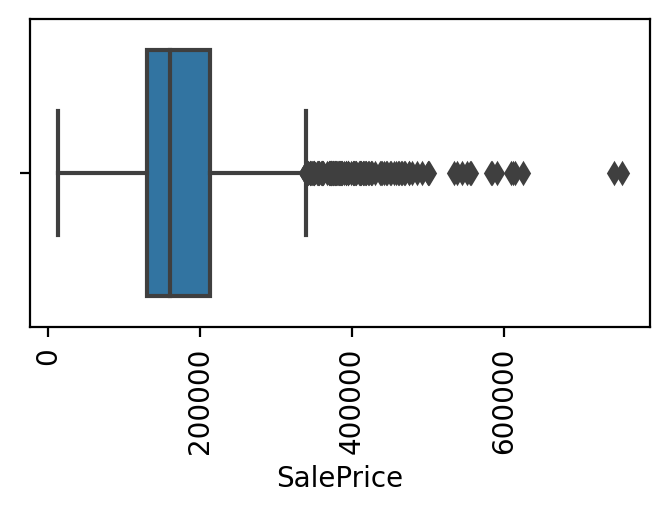

In [71]:
# 1. outliers (by inter-quartiles)
q75, q25 = np.percentile(df['SalePrice'], [80, 15])
iqr = q75 - q25
lower_bound = q25 - 1.5*iqr
upper_bound = q75 + 1.5*iqr 
plt.figure(dpi=200, figsize=(4,2))
plt.xticks(rotation='vertical')
sns.boxplot(x=df['SalePrice']);
ind_drop = df[(df['Gr Liv Area']>4000) & (df['SalePrice']<400000)].index
df = df.drop(ind_drop,axis=0)

#### 5.2 Clean data: missing values

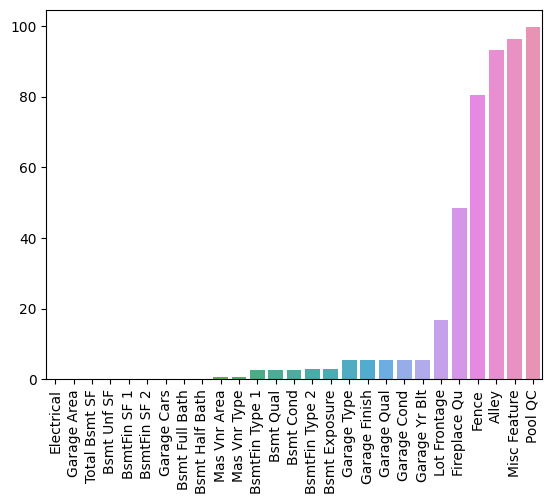

In [72]:
# remove id column 
# df = df.drop('PID',axis=1)

# check missing value counts by col
def percent_missing(df):
    percent_nan = 100* df.isnull().sum() / len(df)
    percent_nan = percent_nan[percent_nan>0].sort_values(ascending=True)
    return percent_nan

percent_nan = percent_missing(df)
sns.barplot(x=percent_nan.index, y=pct_missing)
plt.xticks(rotation=90);

In [73]:
# impute the columns with <1% missing values 
print(percent_nan[percent_nan < 1])
bsmt_num_cols = ['BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF','Total Bsmt SF', 'Bsmt Full Bath', 'Bsmt Half Bath']
df[bsmt_num_cols] = df[bsmt_num_cols].fillna(0)
bsmt_str_cols =  ['Bsmt Qual', 'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin Type 2']
df[bsmt_str_cols] = df[bsmt_str_cols].fillna('None')

Electrical        0.034165
Garage Area       0.034165
Total Bsmt SF     0.034165
Bsmt Unf SF       0.034165
BsmtFin SF 1      0.034165
BsmtFin SF 2      0.034165
Garage Cars       0.034165
Bsmt Full Bath    0.068329
Bsmt Half Bath    0.068329
Mas Vnr Area      0.785787
Mas Vnr Type      0.785787
dtype: float64


In [74]:
# drop rows with missing data (for cols with only one or two missing values)
df = df.dropna(axis=0,subset= ['Electrical','Garage Cars'])

In [75]:
# simple fill 
df["Mas Vnr Type"] = df["Mas Vnr Type"].fillna("None")
df["Mas Vnr Area"] = df["Mas Vnr Area"].fillna(0)
gar_str_cols = ['Garage Type', 'Garage Finish', 'Garage Qual', 'Garage Cond']
df[gar_str_cols] = df[gar_str_cols].fillna('None')
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)
df['Fireplace Qu'] = df['Fireplace Qu'].fillna("None")

In [76]:
# drop cols with high # of missing values
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis=1)

In [85]:
# impute based on other cols using transform (apply avg to missing values)
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda val: val.fillna(val.mean()))
df['Lot Frontage'] = df['Lot Frontage'].fillna("0")

#### 5.3. Clean data: Categorical variables 

In [87]:
# Convert to String
df['MS SubClass'] = df['MS SubClass'].apply(str)
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')
df_objs = pd.get_dummies(df_objs,drop_first=True)
df = pd.concat([df_nums,df_objs],axis=1)

#### 5.4 Fit the model

In [92]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
base_elastic_model = ElasticNet()
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)
grid_model.fit(scaled_X_train,y_train)
grid_model.best_params_

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/Users/zouserena/Library/CloudStorage/OneDrive-TheBostonConsultingGroup,Inc/00 L&D/03 Self-learning/03 cousera/python_for_ml/.env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 131306083468.3974, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(
/Users/zouserena/Library/CloudStorage/OneDrive-TheBostonConsultingGroup,Inc/00 L&D/03 Self-learning/03 cousera/python_for_ml/.env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 159185252257.47656, tolerance: 1307913805.6588457
  model = cd_fast.enet_coordinate_descent(
/Users/zouserena/Library/CloudStorage/OneDrive-TheBostonConsultingGroup,Inc/00 L&D/03 Self-l

/Users/zouserena/Library/CloudStorage/OneDrive-TheBostonConsultingGroup,Inc/00 L&D/03 Self-learning/03 cousera/python_for_ml/.env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 266809372543.9142, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(
/Users/zouserena/Library/CloudStorage/OneDrive-TheBostonConsultingGroup,Inc/00 L&D/03 Self-learning/03 cousera/python_for_ml/.env/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 263693648183.4789, tolerance: 1307913805.6588457
  model = cd_fast.enet_coordinate_descent(
/Users/zouserena/Library/CloudStorage/OneDrive-TheBostonConsultingGroup,Inc/00 L&D/03 Self-learning/03 cousera/python_for_ml/.env/lib/python3.8/site-packages/sklearn/linear_m

{'alpha': 100, 'l1_ratio': 1}

In [93]:
#### 5.5. check model perf 
y_pred = grid_model.predict(scaled_X_test)
mean_absolute_error(y_test,y_pred)
np.sqrt(mean_squared_error(y_test,y_pred))
np.mean(df['SalePrice'])

180815.53743589742